## Importing the Necessary Packages


In [ ]:
# Data management/manipulation libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for accessing the directory of images
from pathlib import Path
from os import listdir

# Libraries for DL modeling
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
import tensorflow as tf

# Setting the tensorflow's random seed
tf.random.set_seed(1)

# Restricting the float value of a dataframe to 3 decimal points
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Removing the limit for the number of displayed columns in a dataframe
pd.set_option("display.max_columns", None)

# Mounting the drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Preparing the Training, Validation and Test Sets

In [ ]:
# Number of images from each facial expression category in the training set
print('No. of angry images in the training set:', len(listdir(
                              '/content/drive/MyDrive/Python_files/Facial_Expressions/train/angry')))
print('No. of disgust images in the training set:', len(listdir(
                              '/content/drive/MyDrive/Python_files/Facial_Expressions/train/disgust')))
print('No. of fear images in the training set:', len(listdir(
                              '/content/drive/MyDrive/Python_files/Facial_Expressions/train/fear')))
print('No. of happy images in the training set:', len(listdir(
                              '/content/drive/MyDrive/Python_files/Facial_Expressions/train/happy')))
print('No. of neutral images in the training set:', len(listdir(
                              '/content/drive/MyDrive/Python_files/Facial_Expressions/train/neutral')))
print('No. of sad images in the training set:', len(listdir(
                              '/content/drive/MyDrive/Python_files/Facial_Expressions/train/sad')))
print('No. of surprise images in the training set:', len(listdir(
                              '/content/drive/MyDrive/Python_files/Facial_Expressions/train/surprise')))

No. of angry images in the training set: 4005
No. of disgust images in the training set: 436
No. of fear images in the training set: 4107
No. of happy images in the training set: 7215
No. of neutral images in the training set: 4965
No. of sad images in the training set: 4840
No. of surprise images in the training set: 3171


In [ ]:
# Creating the generator objects of the images
train_path = Path('/content/drive/MyDrive/Python_files/Facial_Expressions/train')
test_path = Path('/content/drive/MyDrive/Python_files/Facial_Expressions/test')

In [ ]:
# Getting the image paths of the training set 
train_image_paths = list(train_path.glob('*/*.jpg'))
train_image_paths = list(map(lambda x: str(x), train_image_paths))

# Shuffling the paths to image files
from random import shuffle
shuffle(train_image_paths)

train_image_paths[:10]

['/content/drive/MyDrive/Python_files/Facial_Expressions/train/happy/Training_39215134.jpg',
 '/content/drive/MyDrive/Python_files/Facial_Expressions/train/angry/Training_72976096.jpg',
 '/content/drive/MyDrive/Python_files/Facial_Expressions/train/fear/Training_77086305.jpg',
 '/content/drive/MyDrive/Python_files/Facial_Expressions/train/sad/Training_10984846.jpg',
 '/content/drive/MyDrive/Python_files/Facial_Expressions/train/happy/Training_94071994.jpg',
 '/content/drive/MyDrive/Python_files/Facial_Expressions/train/sad/Training_66967267.jpg',
 '/content/drive/MyDrive/Python_files/Facial_Expressions/train/angry/Training_70713840.jpg',
 '/content/drive/MyDrive/Python_files/Facial_Expressions/train/sad/Training_19639838.jpg',
 '/content/drive/MyDrive/Python_files/Facial_Expressions/train/happy/Training_40656055.jpg',
 '/content/drive/MyDrive/Python_files/Facial_Expressions/train/angry/Training_86049400.jpg']

In [ ]:
# Getting the image paths of the testing set 
test_image_paths = list(test_path.glob('*/*.jpg'))
test_image_paths = list(map(lambda x: str(x), test_image_paths))

# Shuffling the paths to image files
shuffle(test_image_paths)

test_image_paths[:10]

['/content/drive/MyDrive/Python_files/Facial_Expressions/test/happy/PrivateTest_9614390.jpg',
 '/content/drive/MyDrive/Python_files/Facial_Expressions/test/neutral/PublicTest_75078346.jpg',
 '/content/drive/MyDrive/Python_files/Facial_Expressions/test/happy/PublicTest_13119862.jpg',
 '/content/drive/MyDrive/Python_files/Facial_Expressions/test/angry/PrivateTest_91043500.jpg',
 '/content/drive/MyDrive/Python_files/Facial_Expressions/test/happy/PrivateTest_22024521.jpg',
 '/content/drive/MyDrive/Python_files/Facial_Expressions/test/surprise/PublicTest_77274972.jpg',
 '/content/drive/MyDrive/Python_files/Facial_Expressions/test/happy/PrivateTest_19562731.jpg',
 '/content/drive/MyDrive/Python_files/Facial_Expressions/test/surprise/PrivateTest_22237388.jpg',
 '/content/drive/MyDrive/Python_files/Facial_Expressions/test/fear/PublicTest_4883166.jpg',
 '/content/drive/MyDrive/Python_files/Facial_Expressions/test/neutral/PublicTest_75168713.jpg']

In [ ]:
# Getting images' labels of the training set
def get_label(image_path):
    return image_path.split("/")[-2]

train_image_labels = list(map(get_label, train_image_paths))
np.array(train_image_labels[:10])

array(['happy', 'angry', 'fear', 'sad', 'happy', 'sad', 'angry', 'sad',
       'happy', 'angry'], dtype='<U5')

In [ ]:
# Getting images' labels of the test set
test_image_labels = list(map(get_label, test_image_paths))
np.array(test_image_labels[:10])

array(['happy', 'neutral', 'happy', 'angry', 'happy', 'surprise', 'happy',
       'surprise', 'fear', 'neutral'], dtype='<U8')

In [ ]:
# Encoding the labels of the training and test sets 
Le = LabelEncoder()
train_image_labels = Le.fit_transform(train_image_labels)
test_image_labels  = Le.transform(test_image_labels)

print('First ten labels of the training set:\n', train_image_labels[:10], sep = '')
print('\nFirst ten labels of the test set:\n', test_image_labels[:10], sep = '')

First ten labels of the training set:
[3 0 2 5 3 5 0 5 3 0]

First ten labels of the test set:
[3 4 3 0 3 6 3 6 2 4]


In [ ]:
# Splitting the test data between the test and validation sets
Test_paths, Val_paths, Test_labels, Val_labels = train_test_split(test_image_paths, test_image_labels, 
                                                                  test_size = 0.5, random_state = 1, stratify = test_image_labels)
Train_paths  = train_image_paths
Train_labels = train_image_labels

In [ ]:
# Calculating the necessary weights to render classes balanced
train_labels_series = pd.Series(Train_labels)
class_weights = {}
for i in np.sort(train_labels_series.unique()):
    class_weights[i] = 1/train_labels_series.value_counts(1)[i]

print(class_weights)

{0: 7.175780274656679, 1: 65.9151376146789, 2: 6.9975651327002675, 3: 3.9832293832293835, 4: 5.788318227593153, 5: 5.937809917355373, 6: 9.063071586250395}


In [ ]:
# One-hot encoding of labels (train, validation and test)
Train_labels = tf.keras.utils.to_categorical(Train_labels)
Val_labels = tf.keras.utils.to_categorical(Val_labels)
Test_labels = tf.keras.utils.to_categorical(Test_labels)

In [ ]:
# Checking the size of different datasets
print('No. of observations in the training set:', len(Train_labels))
print('No. of observations in the validation set:', len(Val_labels))
print('No. of observations in the test set:', len(Test_labels))

No. of observations in the training set: 28739
No. of observations in the validation set: 3589
No. of observations in the test set: 3588


# Transforming Images Into Tensorflow Objects



In [ ]:
# Defining a image loading and decoding (quantifying) object
def load(image , label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels = 3)
    return image, label

In [ ]:
# Defining the image and batch sizes 
IMG_SIZE = 96 
BATCH_SIZE = 64

# Resizing layer
resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)          
])

# Data augmentation layer
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor = (-0.15, 0.05))
])

In [ ]:
# Functions used for creation tensorflow data objects to, compatible with CNN-based modeling
AUTOTUNE = tf.data.experimental.AUTOTUNE
def get_dataset(paths, labels, train = True):
    # Converting image paths and labels to tensors
    image_paths = tf.convert_to_tensor(paths)
    labels = tf.convert_to_tensor(labels)

    # Converting tensors into tensor datasets
    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)

    # Zipping image paths and labels as one onject
    dataset = tf.data.Dataset.zip((image_dataset , label_dataset))

    # Loading, resizing, shuffling and batching the datasets
    dataset = dataset.map(lambda image, label: load(image, label))
    dataset = dataset.map(lambda image, label: (resize(image), label), num_parallel_calls = AUTOTUNE)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(BATCH_SIZE)

    # Augmenting the datasets (only for training set)
    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label), num_parallel_calls=AUTOTUNE)
        dataset = dataset.repeat()
    
    return dataset

In [ ]:
# Creating the CNN-compatible training set and verifying it
train_set = get_dataset(Train_paths, Train_labels)

image, label = next(iter(train_set))
print(image.shape)
print(label.shape)

(64, 96, 96, 3)
(64, 7)


neutral


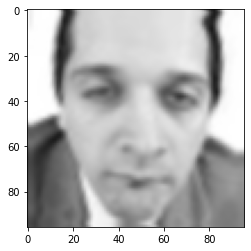

In [ ]:
# Viewing a sample training image
print(Le.inverse_transform(np.argmax(label, axis = 1))[0])
plt.grid(False);
plt.imshow(image[0].numpy()/255);

In [ ]:
# Creating the CNN-compatible validation set and verifying it
val_set = get_dataset(Val_paths, Val_labels, train = False)

image, label = next(iter(val_set))
print(image.shape)
print(label.shape)

(64, 96, 96, 3)
(64, 7)


sad


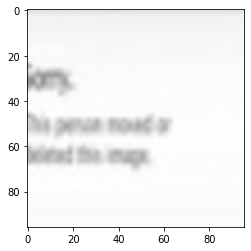

In [ ]:
# Viewing a sample validation image
print(Le.inverse_transform(np.argmax(label, axis = 1))[0])
plt.grid(False);
plt.imshow(image[0].numpy()/255);

In [ ]:
# Creating the CNN-compatible training set and verifying it
test_set = get_dataset(Test_paths, Test_labels, train = False)

image, label = next(iter(test_set))
print(image.shape)
print(label.shape)

(64, 96, 96, 3)
(64, 7)


surprise


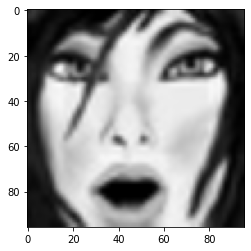

In [ ]:
# Viewing a sample test image
print(Le.inverse_transform(np.argmax(label, axis = 1))[0])
plt.grid(False);
plt.imshow(image[0].numpy()/255);

## Building the Model

In [ ]:
# Importing and nuilding the backbone model
from tensorflow.keras.applications import EfficientNetB2
backbone = EfficientNetB2(
    input_shape = (IMG_SIZE, IMG_SIZE, 3),
    include_top = False
)

# Importing functions required to build the CNN layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalMaxPool2D, Flatten 
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization 

model = Sequential([
    backbone,
    BatchNormalization(),
    GlobalAveragePooling2D(),
    Dropout(0.4),
    BatchNormalization(),
    Dense(128, activation = 'relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(64, activation = 'relu'),
    Dense(len(class_weights.keys()), activation = 'softmax')
])

# Viewing the summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 3, 3, 1408)       7768569   
                                                                 
 batch_normalization_3 (Batc  (None, 3, 3, 1408)       5632      
 hNormalization)                                                 
                                                                 
 global_average_pooling2d_1   (None, 1408)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_2 (Dropout)         (None, 1408)              0         
                                                                 
 batch_normalization_4 (Batc  (None, 1408)             5632      
 hNormalization)                                                 
                                                      

In [ ]:
# Adding the optimizer and performance metrics to the model  
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.002, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-07),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', tf.keras.metrics.Precision(name = 'precision'), tf.keras.metrics.Recall(name = 'recall')]
)

In [ ]:
# Train the model
history = model.fit(
    train_set,
    steps_per_epoch = len(Train_paths)//BATCH_SIZE,
    epochs = 12,
    validation_data = val_set,
    validation_steps = len(Val_paths)//BATCH_SIZE,
    class_weight = class_weights
)

Epoch 1/12
449/449 [==============================] - 10698s 24s/step - loss: 12.0379 - accuracy: 0.3370 - precision: 0.6247 - recall: 0.1318 - val_loss: 1.5329 - val_accuracy: 0.4269 - val_precision: 0.6447 - val_recall: 0.2835
Epoch 2/12
449/449 [==============================] - 124s 274ms/step - loss: 10.2420 - accuracy: 0.4399 - precision: 0.6804 - recall: 0.2325 - val_loss: 1.5168 - val_accuracy: 0.4241 - val_precision: 0.6426 - val_recall: 0.2388
Epoch 3/12
449/449 [==============================] - 125s 279ms/step - loss: 10.2734 - accuracy: 0.4391 - precision: 0.6857 - recall: 0.2411 - val_loss: 1.3121 - val_accuracy: 0.4953 - val_precision: 0.6724 - val_recall: 0.3139
Epoch 4/12
449/449 [==============================] - 123s 275ms/step - loss: 9.3179 - accuracy: 0.4900 - precision: 0.7023 - recall: 0.2925 - val_loss: 1.1940 - val_accuracy: 0.5399 - val_precision: 0.6940 - val_recall: 0.3803
Epoch 5/12
449/449 [==============================] - 125s 278ms/step - loss: 8.8324 

### Notes:

Model is trained in two steps: First, the model is trained with the purpose of detecting the general patterns and features with no callbacks and interference. Then, the training of the backbone layer is turned off and focus is completely given to correctly identifying the facial expression, and ensuring that the validation accuracy constantly increases, using several callbacks.

In [ ]:
# Making the backbone fixed (untrainabled)
model.layers[0].trainable = False

# Changing the learning rate of the optimizer
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.008, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-07),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', tf.keras.metrics.Precision(name = 'precision'), tf.keras.metrics.Recall(name = 'recall')]
)

# Defining the callbacks 
save_best  = tf.keras.callbacks.ModelCheckpoint("best_weights.h5", monitor = 'val_accuracy', mode = 'max',
                                                save_best_only = True, save_weights_only = True, verbose = 1)
lr_reduce  = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy', mode = 'max', verbose = 1, 
                                                  factor = 0.5, patience = 2, min_lr = 1e-4) 
early_stop = tf.keras.callbacks.EarlyStopping(patience = 5, verbose = 1)

# Revisiting the model's summary (after turning off the backbone)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 3, 3, 1408)       7768569   
                                                                 
 batch_normalization_3 (Batc  (None, 3, 3, 1408)       5632      
 hNormalization)                                                 
                                                                 
 global_average_pooling2d_1   (None, 1408)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_2 (Dropout)         (None, 1408)              0         
                                                                 
 batch_normalization_4 (Batc  (None, 1408)             5632      
 hNormalization)                                                 
                                                      

In [ ]:
# Train the model
history = model.fit(
    train_set,
    steps_per_epoch = len(Train_paths)//BATCH_SIZE,
    epochs = 15,
    callbacks = [save_best, lr_reduce, early_stop],
    validation_data = val_set,
    validation_steps = len(Val_paths)//BATCH_SIZE,
    class_weight = class_weights
)

Epoch 1/15
449/449 [==============================] - ETA: 0s - loss: 7.5686 - accuracy: 0.5915 - precision: 0.7308 - recall: 0.4338
Epoch 1: val_accuracy improved from -inf to 0.60631, saving model to best_weights.h5
449/449 [==============================] - 93s 187ms/step - loss: 7.5686 - accuracy: 0.5915 - precision: 0.7308 - recall: 0.4338 - val_loss: 1.0878 - val_accuracy: 0.6063 - val_precision: 0.6987 - val_recall: 0.5059 - lr: 0.0080
Epoch 2/15
449/449 [==============================] - ETA: 0s - loss: 7.2748 - accuracy: 0.5949 - precision: 0.7292 - recall: 0.4413
Epoch 2: val_accuracy improved from 0.60631 to 0.60798, saving model to best_weights.h5
449/449 [==============================] - 79s 176ms/step - loss: 7.2748 - accuracy: 0.5949 - precision: 0.7292 - recall: 0.4413 - val_loss: 1.0605 - val_accuracy: 0.6080 - val_precision: 0.7053 - val_recall: 0.5014 - lr: 0.0080
Epoch 3/15
449/449 [==============================] - ETA: 0s - loss: 7.2747 - accuracy: 0.5997 - preci

In [ ]:
# Loading the optimal weights into the model
model.load_weights("best_weights.h5")

## Testing the Model

In [ ]:
# Evaluating the loaded model
loss, acc, prec, recall = model.evaluate(test_set, verbose = 1)

print('Accuracy score of the model on the test set:', round(acc, 3))
print('Precision score of the model on the test set:', round(prec, 3))
print('Recall score of the model on the test set:', round(recall, 3))

57/57 [==============================] - 297s 5s/step - loss: 1.0479 - accuracy: 0.6003 - precision: 0.7099 - recall: 0.4713
Accuracy score of the model on the test set: 0.6
Precision score of the model on the test set: 0.71
Recall score of the model on the test set: 0.471


## Storing the Model for Future Applications

In [ ]:
# Defining a function for saving the label encoder
import pickle
def save_object(obj , name):
    pickle_obj = open(f'{name}.pck', 'wb')
    pickle.dump(obj, pickle_obj)
    pickle_obj.close()

In [ ]:
# Saving the encoder
save_object(Le, 'LabelEncoder')
# Saving the model
model.save('FacialExpressionModel.h5')